In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input


In [6]:
# Carregar os dados
def load_data(path="dataset/titanic/train.csv"):
    data = pd.read_csv(path)
    print(data.head(100))
    return data
load_data()

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
..          ...       ...     ...   
95           96         0       3   
96           97         0       1   
97           98         1       1   
98           99         1       2   
99          100         0       2   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
..                                                ...     ...   ...    ...   
95       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Pré-processamento dos dados
def preprocess_data(data):
    # PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
    # Selecionar colunas úteis
    #features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
    features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
    #features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
    #features = ["Pclass", "Sex", "Age", "Fare"]
    target = "Survived"

    # Remover linhas com valores nulos em colunas importantes
    #data = data[features + [target]].dropna()
    #data = data[features + [target]].fillna(0)
    data["Age"] = data["Age"].fillna(data["Age"].mean())

    # Transformar variáveis categóricas
    label_encoder_sex = LabelEncoder()
    data["Sex"] = label_encoder_sex.fit_transform(data["Sex"])  # 'male' -> 1, 'female' -> 0

    label_encoder_embarked = LabelEncoder()
    data["Embarked"] = label_encoder_embarked.fit_transform(data["Embarked"])

    # Normalizar apenas o campo Age entre 0 e 1
    data["Age"] = (data["Age"] - data["Age"].min()) / (data["Age"].max() - data["Age"].min())

    # Normalizar apenas o campo Pclass entre 0 e 1
    #data["Pclass"] = (data["Pclass"] - data["Pclass"].min()) / (data["Pclass"].max() - data["Pclass"].min())
    data["Pclass"] = 1 - (data["Pclass"] - data["Pclass"].min()) / (data["Pclass"].max() - data["Pclass"].min())

    data["Fare"] = (data["Fare"] - data["Fare"].min()) / (data["Fare"].max() - data["Fare"].min())


    # Normalizar os outros campos
    scaler = StandardScaler()
    #columns_to_scale = ["SibSp", "Parch", "Fare", "Embarked"]
    #columns_to_scale = ["SibSp", "Parch", "Embarked"]
    #data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

    data["SibSp"] = (data["SibSp"] - data["SibSp"].min()) / (data["SibSp"].max() - data["SibSp"].min())
    data["Parch"] = (data["Parch"] - data["Parch"].min()) / (data["Parch"].max() - data["Parch"].min())
    #data["Embarked"] = (data["Embarked"] - data["Embarked"].min()) / (data["Embarked"].max() - data["Embarked"].min())

    data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
    features.append("FamilySize")
    features.remove("SibSp")
    features.remove("Parch")

    # Separar entrada (X) e saída (y)
    X = data[features]
    y = data[target]

    print(X.head(10))

    # Normalizar os dados
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y, features

preprocess_data(load_data())

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
..          ...       ...     ...   
95           96         0       3   
96           97         0       1   
97           98         1       1   
98           99         1       2   
99          100         0       2   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
..                                                ...     ...   ...    ...   
95       

(array([[-8.27377244e-01,  7.37695132e-01, -5.92480600e-01,
         -5.02445171e-01,  5.81113943e-01, -1.73722153e-02],
        [ 1.56610693e+00, -1.35557354e+00,  6.38789012e-01,
          7.86845294e-01, -1.93846038e+00, -1.73722153e-02],
        [-8.27377244e-01, -1.35557354e+00, -2.84663197e-01,
         -4.88854258e-01,  5.81113943e-01, -5.63677290e-01],
        ...,
        [-8.27377244e-01, -1.35557354e+00, -3.39951802e-16,
         -1.76263239e-01,  5.81113943e-01,  1.43944132e+00],
        [ 1.56610693e+00,  7.37695132e-01, -2.84663197e-01,
         -4.43810379e-02, -1.93846038e+00, -5.63677290e-01],
        [-8.27377244e-01,  7.37695132e-01,  1.77062908e-01,
         -4.92377828e-01, -6.78673218e-01, -5.63677290e-01]]),
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64,
 ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize'])

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
..          ...       ...     ...   
95           96         0       3   
96           97         0       1   
97           98         1       1   
98           99         1       2   
99          100         0       2   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
..                                                ...     ...   ...    ...   
95       

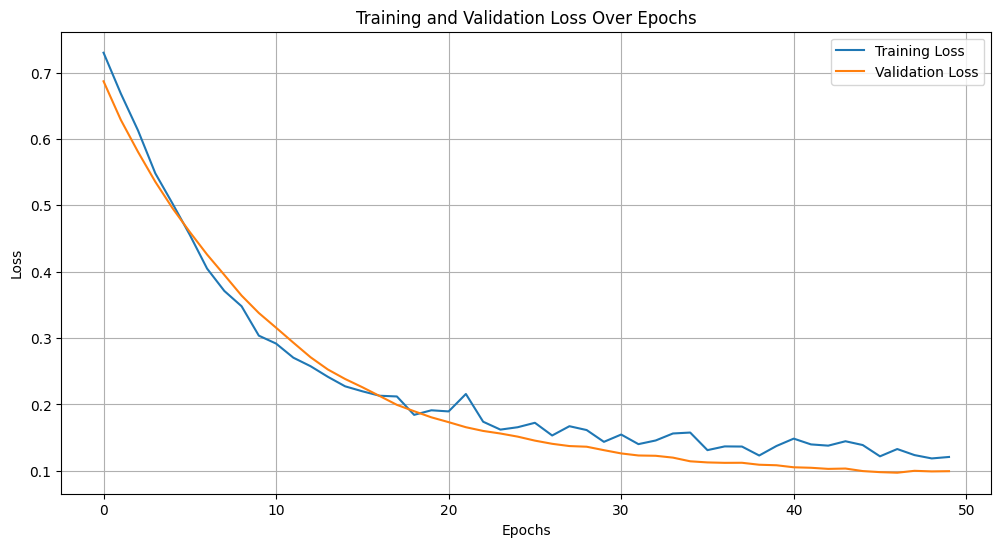

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


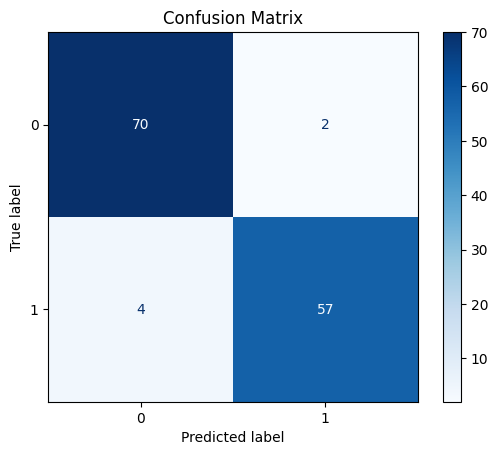


Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.95      0.97      0.96        72
       Survived       0.97      0.93      0.95        61

       accuracy                           0.95       133
      macro avg       0.96      0.95      0.95       133
   weighted avg       0.96      0.95      0.95       133



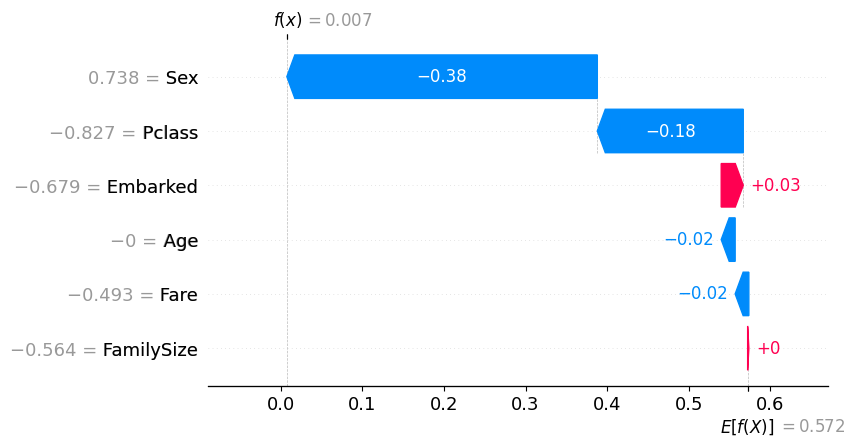

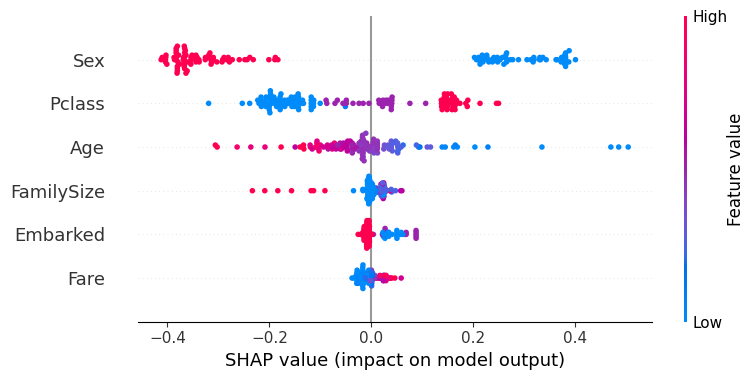

    PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..          ...     ...                                                ...   
95          987       3                         Tenglin, Mr. Gunnar Isidor   
96          988       1  Cavendish, Mrs. Tyrell William (Julia Florence...   
97          989       3                          Makinen, Mr. Kalle Edvard   
98          990       3                       Braf, Miss. Elin Ester Maria   
99          991       3                       Nancarrow, Mr. William Henry   

       Sex   Age  SibSp  Parch             Ticket     Fare Cabi

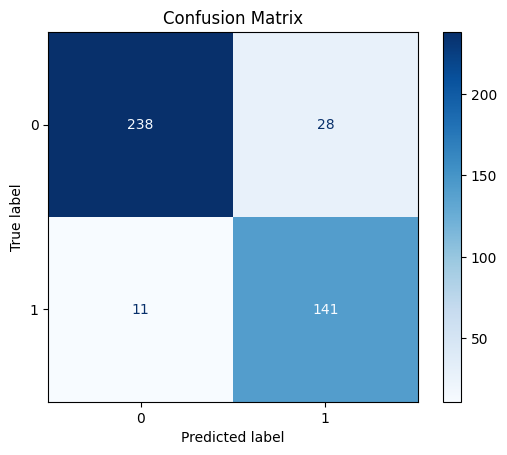


Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.96      0.89      0.92       266
       Survived       0.83      0.93      0.88       152

       accuracy                           0.91       418
      macro avg       0.90      0.91      0.90       418
   weighted avg       0.91      0.91      0.91       418

{'Did Not Survive': {'precision': 0.9558232931726908, 'recall': 0.8947368421052632, 'f1-score': 0.9242718446601942, 'support': 266.0}, 'Survived': {'precision': 0.834319526627219, 'recall': 0.9276315789473685, 'f1-score': 0.8785046728971962, 'support': 152.0}, 'accuracy': 0.9066985645933014, 'macro avg': {'precision': 0.8950714098999548, 'recall': 0.9111842105263158, 'f1-score': 0.9013882587786952, 'support': 418.0}, 'weighted avg': {'precision': 0.9116401053379738, 'recall': 0.9066985645933014, 'f1-score': 0.9076292367463767, 'support': 418.0}}
Modelo salvo com acurácia: 90.67%


In [8]:

# Criar o modelo MLP
def create_model0(input_dim):
    model = Sequential([
        Dense(32, activation="relu", input_dim=input_dim),
        Dropout(0.2),  # Para evitar overfitting
        Dense(16, activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")  # Saída binária
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

def create_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Define explicitamente o shape da entrada
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")  # Saída binária
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# Treinamento e Avaliação
def train_and_evaluate():
    # Carregar e pré-processar os dados
    train_data = load_data()
    X, y, features_name = preprocess_data(train_data)

    # Reamostragem com SMOTE
    #smote = SMOTE(random_state=42)
    #X_resampled, y_resampled = smote.fit_resample(X, y)

    #adasyn = ADASYN(random_state=42)
    #X_resampled, y_resampled = adasyn.fit_resample(X, y)

    smote_enn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)

    # Dividir os dados em treinamento e teste
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Criar o modelo
    model = create_model(input_dim=X_train.shape[1])

    # Treinar o modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Avaliar no conjunto de teste
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    # Exibir curvas de erro
    plot_learning_curves(history)

    # Predições e matriz de confusão
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    display_confusion_matrix(y_test, y_pred)

    import shap

    # Criar o explainer para o modelo
    explainer = shap.Explainer(model, X_train, feature_names=features_name)

    # Obter valores SHAP para o conjunto de teste
    shap_values = explainer(X_test)

    # Visualizar explicações para uma instância
    shap.plots.waterfall(shap_values[0])

    # Visualizar importância global das features
    shap.summary_plot(shap_values, X_test)

    return model

# Exibir curvas de erro médio
def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

# Exibir matriz de confusão
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    report = classification_report(y_true, y_pred, target_names=["Did Not Survive", "Survived"], output_dict=False)

    print("\nClassification Report:")
    print(report)

    report_as_dict = classification_report(y_true, y_pred, target_names=["Did Not Survive", "Survived"], output_dict=True)

    return report_as_dict

def make_pred_by_test(model):
    test_data = load_data("dataset/titanic/test.csv")
    gender_data = load_data("dataset/titanic/gender_submission.csv")

    gender_test_data = test_data.merge(gender_data, on="PassengerId")
    print(gender_test_data.head())

    X, y, features_name = preprocess_data(gender_test_data)

    # Fazer predições
    y_pred_probs = model.predict(X)  # Probabilidades de sobrevivência
    y_pred = (y_pred_probs > 0.5).astype("int32")  # Classificar como 0 ou 1 com base no threshold

    report = display_confusion_matrix(y, y_pred)

    # Extrair a acurácia
    accuracy = report["accuracy"]
    print(report)

    # Condição para salvar o modelo
    if accuracy >= 0.90:
        decimals = int((accuracy - int(accuracy)) * 100)
        model.save(f"models/high_accuracy_model_accuracy_{decimals}.keras")
        print(f"Modelo salvo com acurácia: {accuracy:.2%}")
    else:
        print(f"Modelo não salvo. Acurácia: {accuracy:.2%} abaixo do limite.")


# Executar o processo completo
if __name__ == "__main__":
    model = train_and_evaluate()
    make_pred_by_test(model)